In [75]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import warnings 
warnings.filterwarnings("ignore") 
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'

# 数据生成
---
 

In [76]:
n = 50#样本个数
np.random.seed=132
# 生成数据
f = lambda x:np.hstack((np.random.normal(x[2*i],x[2*i+1],(n,1)) for i in range(2)))
a = f([ 1,1, 1,2])
b = f([ 1,1,20,2])
c = f([7,1,12,1])
# 将数据合并一块
data = np.r_[a,b,c]

# 数据可视化
---
 

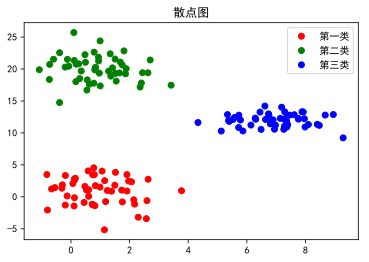

In [77]:
# 散点图

plt.title('散点图')
plt.plot(a[:,0],a[:,1],'ro',b[:,0],b[:,1],'go',c[:,0],c[:,1],'bo')
plt.legend(['第一类','第二类','第三类'])
plt.show()

# 算法实现与求解

In [78]:
def k_means(data, k = 3):
    # 随机取k的点作为初始向量
    mu_flag = data[np.random.permutation(len(data))[:k]]
    mu = np.zeros_like(mu_flag)
    
    while(abs(mu_flag - mu).sum()> 1e-8):#     迭代寻找最优解
        mu = mu_flag.copy()
        cluster = dict(zip(range(0,k),[[] for i in range(k)]))
    
        for i,datai in enumerate(data):#     划分类别
            min_idx = np.argmin(np.linalg.norm(mu - datai,axis=1))
            cluster[min_idx].append(i)
    
        for i in range(k):#     更新质心
            mu_flag[i] = np.mean(data[cluster[i]],axis=0)
    return mu ,cluster  

In [79]:
# 进行聚类
mu,cluster  = k_means(data,3)
mu

array([[ 0.90592497, 20.03530732],
       [ 6.94212366, 11.95152888],
       [ 0.92157638,  0.97707103]])

# 结果数据可视化

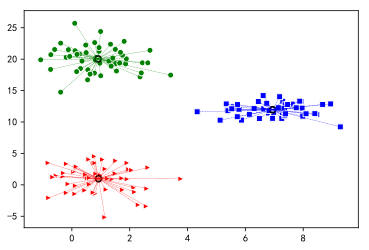

In [80]:
mu,cluster  = k_means(data,3)
re_color = ['r','g','b']
pre_marker = ['o',',','>']
for i,datai in enumerate(data):
    marker_idx = [j for j in range(len(cluster)) if np.isin(i,cluster[j])][0]
    a = plt.scatter(datai[0],datai[1],c = re_color[i//n],marker=pre_marker[marker_idx],edgecolors='w')
    plt.plot([datai[0],mu[marker_idx,0]],[datai[1],mu[marker_idx,1]],re_color[i//n]+'--',linewidth = 0.3 )
    
plt.scatter(mu[:,0],mu[:,1],c='w',marker='o',edgecolors='k',linewidths=1.8)
plt.show()